## 1) Binary classification

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from model import NeuralNetwork
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
# Plot probabilities
def plot_proba(model, x_min, x_max, y_min, y_max):

    # Generate grid
    x1 = np.linspace(x_min,x_max,101)
    x2 = np.linspace(y_min,y_max,101)
    x1, x2 = np.meshgrid(x1, x2, indexing = 'ij') 
    to_forward = np.concatenate((np.expand_dims(np.reshape(x2, (-1)),1),np.expand_dims(np.reshape(x1, (-1)),1)), axis = 1)
    
    # Forward inputs
    z = np.zeros((to_forward.shape[0], 1))
    for i in range(to_forward.shape[0]):
        model.forward(np.expand_dims(to_forward[i,:], axis = 1))
        z[i] = model.layers[-1].A[0,0]
    z = np.reshape(z, x1.shape)
    
    # Plot:
    z_min, z_max = 0., 1.
    plt.figure(figsize = (10,6))
    plt.pcolor(x1, x2, z, vmin = z_min, vmax = z_max)
    plt.show()

In [3]:
# Generate data
X, y = make_circles(n_samples = 5000, factor = 0.3, noise = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

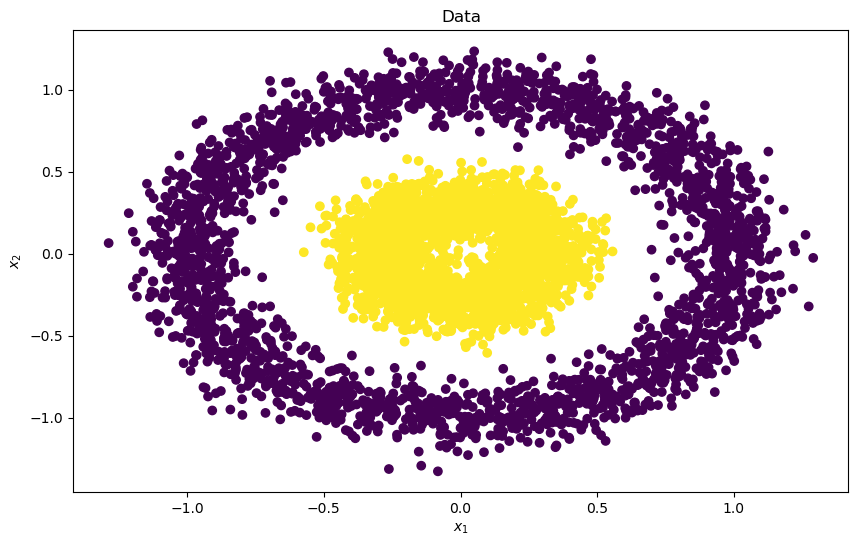

In [4]:
# Visualize data
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Data")
plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
plt.show()

In [5]:
# Instanciate a network
nn = NeuralNetwork(input_dim = 2, hidden_dims = [8,4], output_dim = 1, task = "classification")

In [6]:
# Train the network
train_list, validation_list = nn.train(nb_epochs = 20, batch_size = 128, alpha = 1., X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

Epoch 20: 100%|█████████| 32/32 [00:00<00:00, 548.77it/s, Training loss=0.00594]


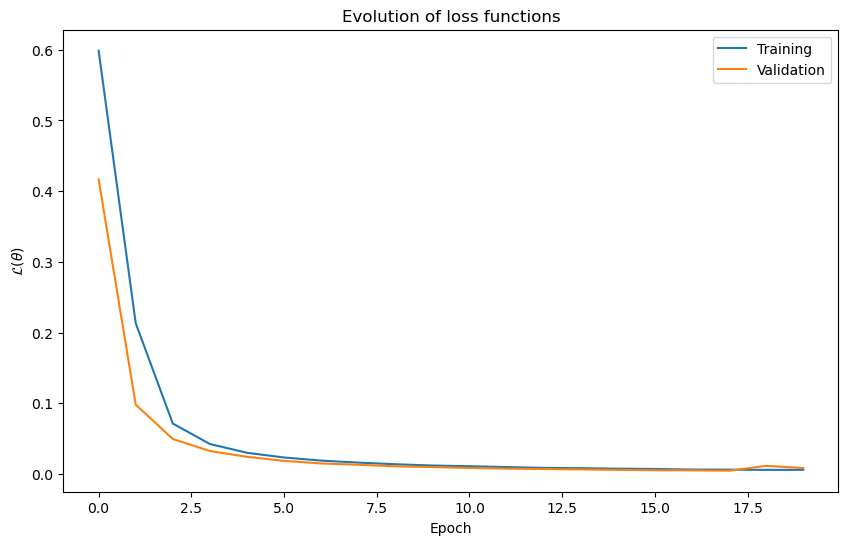

In [7]:
# Plot loss functions
plt.figure(figsize = (10,6))
plt.plot(train_list, label = 'Training')
plt.plot(validation_list, label = 'Validation')
plt.title("Evolution of loss functions")
plt.xlabel("Epoch")
plt.ylabel(r"$\mathcal{L}(\theta)$")
plt.legend()
plt.show()

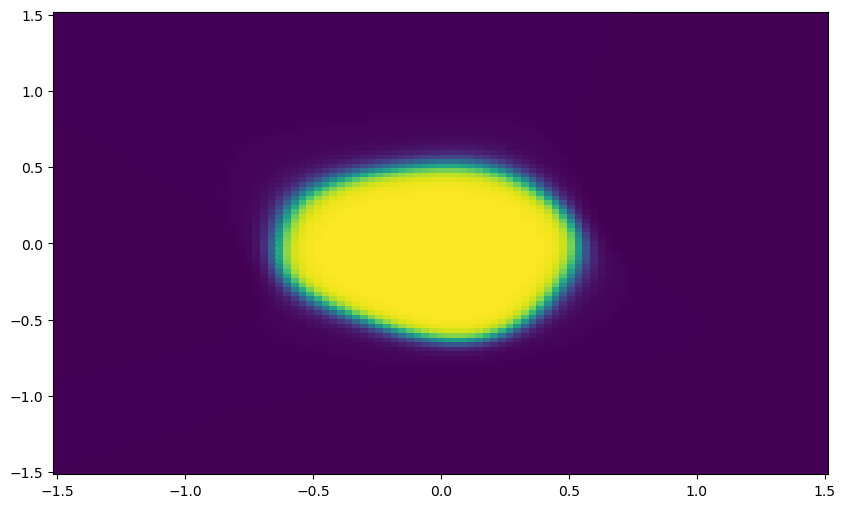

In [8]:
# Plot probabilities
plot_proba(nn, -1.5, 1.5, -1.5, 1.5)

In [9]:
# Compute accuracy
acc = np.sum(nn.predict(X_val) == y_val)/ y_val.shape[0] * 100
print("Accuracy: " + str(acc) + "%")

Accuracy: 99.9%


## 2) Multiclass classification

In [10]:
# Generate data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [11]:
# Instanciate a network
nn = NeuralNetwork(input_dim = 4, hidden_dims = [8], output_dim = 3, task = "classification")

In [12]:
# Train the network
train_list, validation_list = nn.train(nb_epochs = 1000, batch_size = 16, alpha = 4e-3, X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

Epoch 101: 100%|███████████| 8/8 [00:00<00:00, 1463.34it/s, Training loss=0.664]


Epoch 202: 100%|████████████| 8/8 [00:00<00:00, 923.75it/s, Training loss=0.567]


Epoch 273:   0%|                     | 0/8 [00:00<?, ?it/s, Training loss=0.536]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 524: 100%|████████████| 8/8 [00:00<00:00, 1772.83it/s, Training loss=0.45]


Epoch 625: 100%|████████████| 8/8 [00:00<00:00, 1582.83it/s, Training loss=0.42]


Epoch 726: 100%|███████████| 8/8 [00:00<00:00, 1205.48it/s, Training loss=0.389]


Epoch 772:   0%|                     | 0/8 [00:00<?, ?it/s, Training loss=0.351]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 1000: 100%|██████████| 8/8 [00:00<00:00, 1985.00it/s, Training loss=0.259]


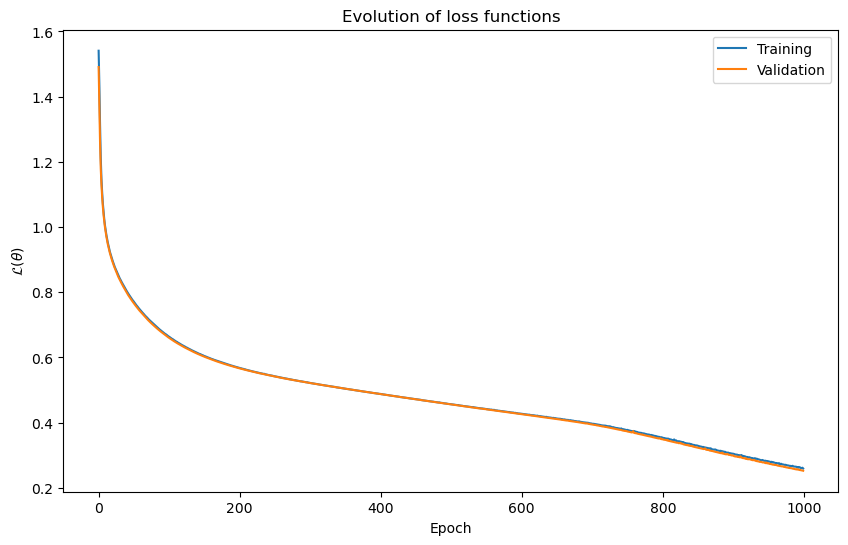

In [13]:
# Plot loss functions
plt.figure(figsize = (10,6))
plt.plot(train_list, label = 'Training')
plt.plot(validation_list, label = 'Validation')
plt.title("Evolution of loss functions")
plt.xlabel("Epoch")
plt.ylabel(r"$\mathcal{L}(\theta)$")
plt.legend()
plt.show()

In [14]:
# Compute accuracy
acc = np.sum(nn.predict(X) == y)/ y.shape[0] * 100
print("Accuracy: " + str(acc) + "%")

Accuracy: 96.66666666666667%


## 3) Regression

In [15]:
# Generate data
a, b = 2., -1.
x = np.linspace(-10., 10, 10000)
eps = np.random.normal(loc = 0., scale = 1., size = (10000,))
y = a*x + b + eps

In [16]:
# Instanciate a network
nn = NeuralNetwork(input_dim = 1, hidden_dims = [], output_dim = 1, task = "regression")

In [17]:
# Train the network
train_list = nn.train(nb_epochs = 50, batch_size = 64, alpha = 3e-4, X_train = np.expand_dims(x, axis = 1), y_train = y)

Epoch 19:   0%|                     | 0/157 [00:00<?, ?it/s, Training loss=1.04]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 50: 100%|████████| 157/157 [00:00<00:00, 2196.68it/s, Training loss=0.995]


In [18]:
# Prediction
pred = nn.predict(np.expand_dims(x, axis = 1))

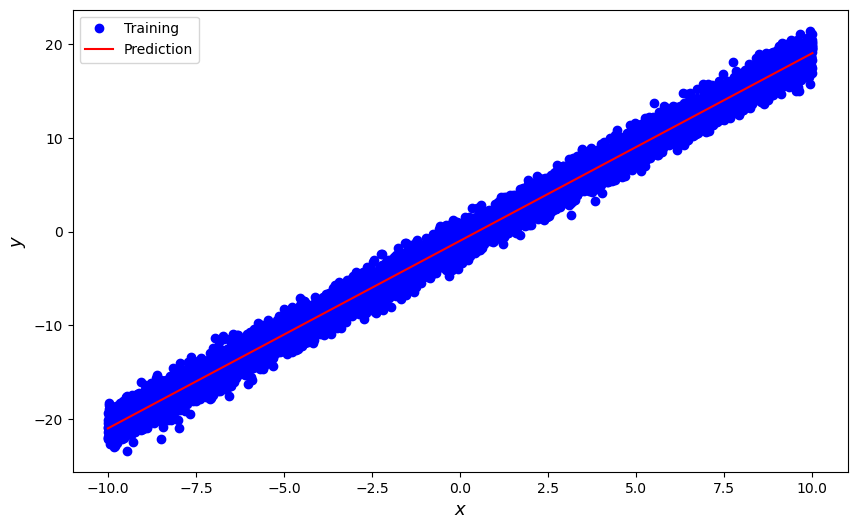

In [19]:
# Plot
plt.figure(figsize = (10,6))
plt.plot(x, y, 'bo', label = 'Training')
plt.plot(x, pred, 'r', label = 'Prediction')
plt.xlabel(r'$x$', fontsize = 13)
plt.ylabel(r'$y$', fontsize = 13)
plt.legend()
plt.show()

In [20]:
# Weigths of the network
print("W = " + str(nn.layers[0].W[0,0]))
print("b = " + str(nn.layers[0].b[0,0]))

W = 2.0035672858287517
b = -0.9816233003358585
